# Unsupervised learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread, imshow

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

from time import time

---

## Image color quantization

shape: (514, 800, 3) | dtype: float64 | range: [0.0, 1.0]


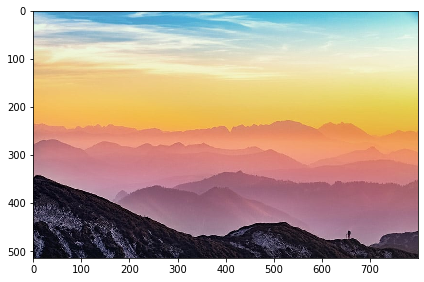

In [2]:
# Image import
img = (imread("data/img.jpg").astype(np.float64))/255
imshow(img)
print(f"shape: {img.shape} | dtype: {img.dtype} | range: [{img.min()}, {img.max()}]")

In [3]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

In [4]:
def quantize_img(img, factor):
    
    # Reshaping
    w, h, d = img.shape
    img_arr = np.reshape(img, (w*h, d))
    n_colors = factor
    
    # Fitting model on a small sub-sample
    img_arr_sample = shuffle(img_arr, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(img_arr_sample)

    # Predicting
    labels = kmeans.predict(img_arr)
    
    q_img = recreate_image(kmeans.cluster_centers_, labels, w, h)
    
    return q_img


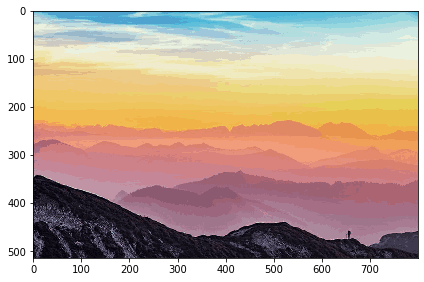

In [11]:
imshow(quantize_img(img, 64)) 

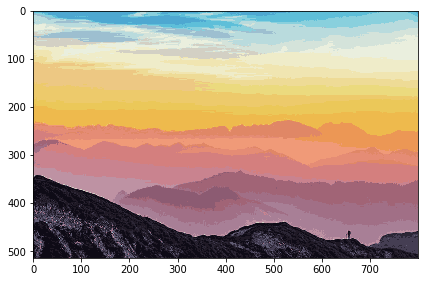

In [12]:
imshow(quantize_img(img, 32)) 

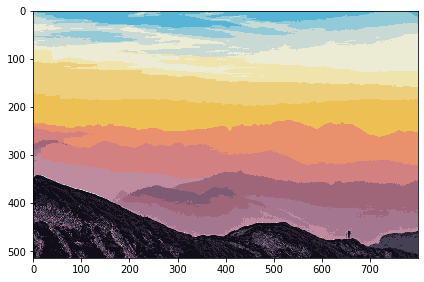

In [9]:
imshow(quantize_img(img, 16)) 

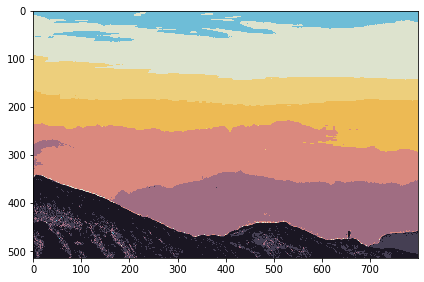

In [13]:
imshow(quantize_img(img, 8)) 